In [1]:
# from google.colab import drive
# drive.mount('/content/drive')
# from pydrive.auth import GoogleAuth
# from pydrive.drive import GoogleDrive
# from google.colab import auth
# from oauth2client.client import GoogleCredentials


In [2]:
# from pydrive.auth import GoogleAuth
# from pydrive.drive import GoogleDrive
# from google.colab import auth
# from oauth2client.client import GoogleCredentials


In [5]:
import pandas as pd 
# df=pd.read_csv('/content/drive/My Drive/Colab Notebooks/DM Project/airlines.csv')
# df1=pd.read_csv('/content/drive/My Drive/Colab Notebooks/DM Project/flights.csv')
# df2=pd.read_csv('/content/drive/My Drive/Colab Notebooks/DM Project/airports.csv')
df=pd.read_csv('airlines.csv')
df1=pd.read_csv('flights.csv')
df2=pd.read_csv('airports.csv')

In [6]:
df.head(30)

,IATA_CODE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways
5,OO,Skywest Airlines Inc.
6,AS,Alaska Airlines Inc.
7,NK,Spirit Air Lines
8,WN,Southwest Airlines Co.
9,DL,Delta Air Lines Inc.


In [7]:
df1.head

<bound method NDFrame.head of          YEAR  MONTH  DAY  DAY_OF_WEEK AIRLINE  FLIGHT_NUMBER TAIL_NUMBER  \
0        2015      1    1            4      AS             98      N407AS   
1        2015      1    1            4      AA           2336      N3KUAA   
2        2015      1    1            4      US            840      N171US   
3        2015      1    1            4      AA            258      N3HYAA   
4        2015      1    1            4      AS            135      N527AS   
...       ...    ...  ...          ...     ...            ...         ...   
1048570  2015      3   25            3      AS            695      N767AS   
1048571  2015      3   25            3      B6            746      N659JB   
1048572  2015      3   25            3      B6            962      N564JB   
1048573  2015      3   25            3      B6           1504      N606JB   
1048574  2015      3   25            3      DL           2619      N931DN   

        ORIGIN_AIRPORT DESTINATION_AIRPORT  S

In [8]:

df2.head

<bound method NDFrame.head of     IATA_CODE                              AIRPORT  \
0         ABE  Lehigh Valley International Airport   
1         ABI             Abilene Regional Airport   
2         ABQ    Albuquerque International Sunport   
3         ABR            Aberdeen Regional Airport   
4         ABY   Southwest Georgia Regional Airport   
..        ...                                  ...   
317       WRG                     Wrangell Airport   
318       WYS               Westerly State Airport   
319       XNA  Northwest Arkansas Regional Airport   
320       YAK                      Yakutat Airport   
321       YUM           Yuma International Airport   

                               CITY STATE COUNTRY  LATITUDE  LONGITUDE  
0                         Allentown    PA     USA  40.65236  -75.44040  
1                           Abilene    TX     USA  32.41132  -99.68190  
2                       Albuquerque    NM     USA  35.04022 -106.60919  
3                          Ab

In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 34 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   YEAR                  1048575 non-null  int64  
 1   MONTH                 1048575 non-null  int64  
 2   DAY                   1048575 non-null  int64  
 3   DAY_OF_WEEK           1048575 non-null  int64  
 4   AIRLINE               1048575 non-null  object 
 5   FLIGHT_NUMBER         1048575 non-null  int64  
 6   TAIL_NUMBER           1041777 non-null  object 
 7   ORIGIN_AIRPORT        1048575 non-null  object 
 8   DESTINATION_AIRPORT   1048575 non-null  object 
 9   SCHEDULED_DEPARTURE   1048575 non-null  int64  
 10  DEPARTURE_TIME        1014990 non-null  float64
 11  DEPARTURE_DELAY       1014990 non-null  float64
 12  TAXI_OUT              1014399 non-null  float64
 13  WHEELS_OFF            1014399 non-null  float64
 14  SCHEDULED_TIME        1048573 non-

#No of flights Cancelled For each Airline

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

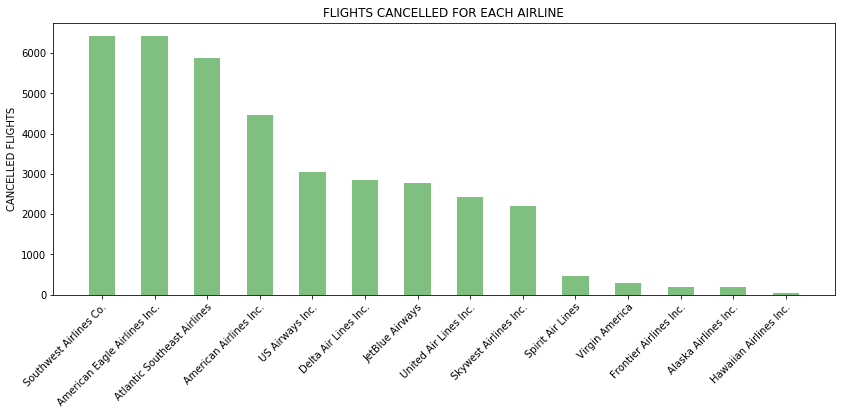

In [11]:
  import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline  
fig,axes = plt.subplots(figsize=(14, 5))
new_indexes=[]
AIRLINES = df1.groupby('AIRLINE').CANCELLED.sum().sort_values(ascending = False)
airline_labels  = AIRLINES.index
AIRLINES       = AIRLINES.values
for i in range(len(airline_labels)):
    dfb = int(df[df['IATA_CODE']==airline_labels[i]].index[0])
    new_indexes.append(df.AIRLINE[dfb])
axes.bar(new_indexes, AIRLINES, align="center", width=0.5, alpha=0.5,color = 'g')
axes.set_ylabel('CANCELLED FLIGHTS')
axes.set_title('FLIGHTS CANCELLED FOR EACH AIRLINE')
axes.set_xticklabels(new_indexes)
plt.setp(axes.get_xticklabels(),rotation=45,ha='right',rotation_mode='anchor') 

As we can see in the graph above , the number of flights cancelled for the airlines "Southwest Airlines Co." and "American Eagle Airlines Co. " , These airlines have maximum cancelled flights reaching above 6000 While 'hawaiian Airlines Inc." have the least number of flights cancelled.
 

#Cancellation Percentage from Overall Cancell Flights

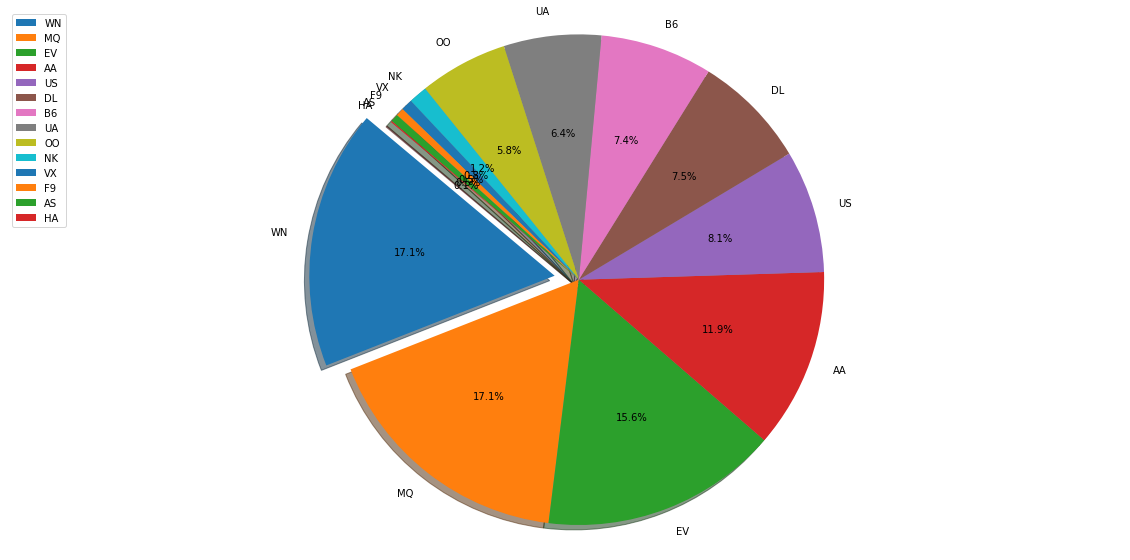

In [12]:

labels = airline_labels
sizes = AIRLINES
fig, axes = plt.subplots(figsize=(20, 10))
explode = (0.1, 0, 0, 0,0,0,0,0,0,0,0,0,0,0)  # explode 1st slice

# Plot
axes.pie(sizes, explode=explode, labels=labels,
autopct='%1.1f%%', shadow=True, startangle=140)

axes.axis('equal')
plt.legend(loc='upper left')
plt.show()





#Flights Status Of Each Airline

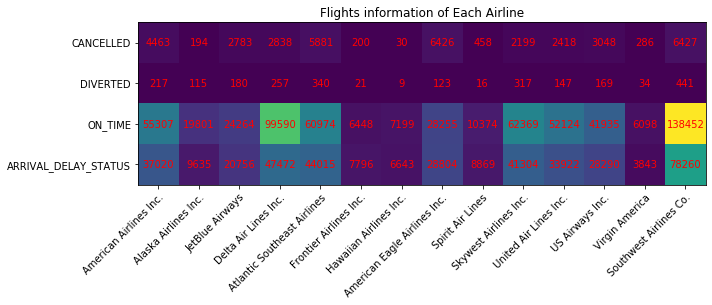

In [13]:

features=['CANCELLED','DIVERTED','ON_TIME','ARRIVAL_DELAY_STATUS']
c1=df1.groupby('AIRLINE').CANCELLED.sum()
c2=df1.groupby('AIRLINE').DIVERTED.sum()
c3=df1.groupby('AIRLINE').ON_TIME.sum()
c4=df1.groupby('AIRLINE').ARRIVAL_DELAY_STATUS.sum()
harvest = np.array([c1,c2,c3,c4])
new_indexes=[]
airline_labels=c1.index
for i in range(len(airline_labels)):
      dfb = int(df[df['IATA_CODE']==airline_labels[i]].index[0])
      new_indexes.append(df.AIRLINE[dfb])

airlines=new_indexes
fig, ax = plt.subplots(figsize=(10, 5))
im = ax.imshow(harvest)
# We want to show all ticks...
ax.set_xticks(np.arange(len(airlines)))
ax.set_yticks(np.arange(len(features)))
# ... and label them with the respective list entries
ax.set_xticklabels(airlines)
ax.set_yticklabels(features)
# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45,ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(features)):
    for j in range(len(airlines)):
        text = ax.text(j, i, harvest[i, j],
                       ha="center", va="center", color="red")

ax.set_title("Flights information of Each Airline")
fig.tight_layout()
plt.show()

#Flights Status On Monthly Basis

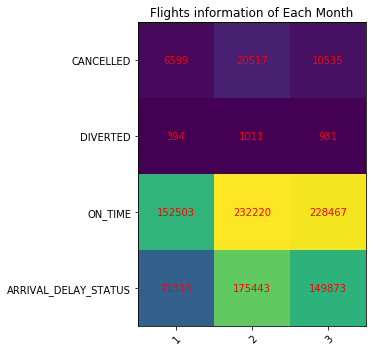

In [14]:
  features=['CANCELLED','DIVERTED','ON_TIME','ARRIVAL_DELAY_STATUS']
total_flights=df1["MONTH"].value_counts()
c1=df1.groupby('MONTH').CANCELLED.sum()
c2=df1.groupby('MONTH').DIVERTED.sum()
c3=df1.groupby('MONTH').ON_TIME.sum()
c4=df1.groupby('MONTH').ARRIVAL_DELAY_STATUS.sum()
harvest = np.array([c1,c2,c3,c4])
new_indexes=[]
airline_labels=df1["MONTH"].unique()
#for i in range(len(airline_labels)):
 #     dfb = int(df[df['IATA_CODE']==airline_labels[i]].index[0])
  #    new_indexes.append(df.AIRLINE[dfb])

airlines=airline_labels
fig, ax = plt.subplots(figsize=(10, 5))
im = ax.imshow(harvest)
# We want to show all ticks...
ax.set_xticks(np.arange(len(airlines)))
ax.set_yticks(np.arange(len(features)))
# ... and label them with the respective list entries
ax.set_xticklabels(airlines)
ax.set_yticklabels(features)
# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45,ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(features)):
    for j in range(len(airlines)):
        text = ax.text(j, i, harvest[i, j],
                       ha="center", va="center", color="red")

ax.set_title("Flights information of Each Month")
fig.tight_layout()
plt.show()

In [15]:
#df1['DepDate'] = pd.to_datetime(df1.YEAR*10000+df1.MONTH*100+df1.DAY,format='%Y%m%d')
#df1=df1.drop(['YEAR'],axis=1)
#df1=df1.drop(['MONTH'],axis=1)
#df1=df1.drop(['DAY'],axis=1)


In [16]:
#dups_color = df1.pivot_table(index=['ORIGIN_AIRPORT'], aggfunc='size')
#print(dups_color.index)
#print(type(dups_color))

#Top 10 Busiest Airports

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

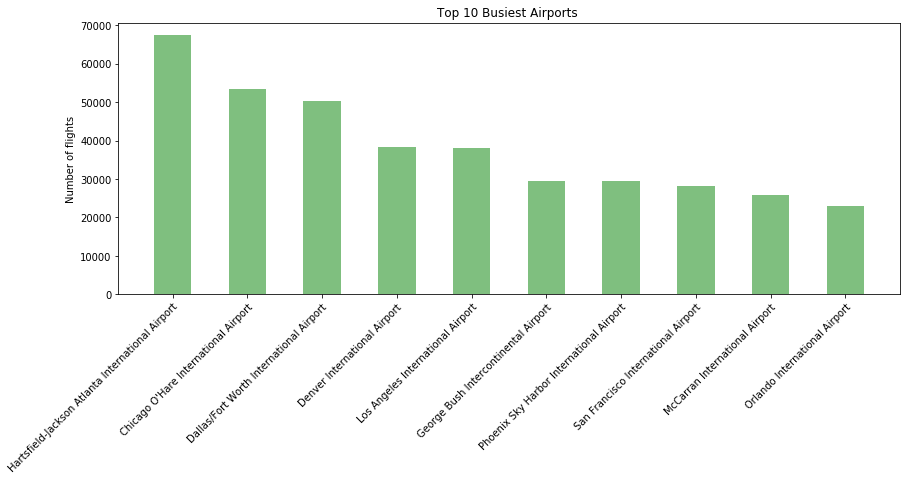

In [17]:
fig, axes = plt.subplots(figsize=(14, 5))
new_indexes=[]
AIRLINES = df1.pivot_table(index=['ORIGIN_AIRPORT'], aggfunc='size')
airlines=AIRLINES.nlargest(10)
airline_labels  = airlines.index
AIRLINES1       = airlines.values
for i in range(len(airline_labels)):

  dfb = int(df2[df2['IATA_CODE']==airline_labels[i]].index[0])
  new_indexes.append(df2.AIRPORT[dfb])
axes.bar(new_indexes, AIRLINES1, align="center", width=0.5, alpha=0.5,color = 'g')
axes.set_ylabel('Number of flights')
axes.set_title('Top 10 Busiest Airports ')
axes.set_xticklabels(new_indexes)
plt.setp(axes.get_xticklabels(),rotation=45,ha='right',rotation_mode='anchor')

In [18]:
x=df1['DISTANCE']
y=int(df1['ELAPSED_TIME'].mean(skipna=True))
df1['ELAPSED_TIME'].fillna(y,inplace=True)
y1=df1['ELAPSED_TIME']

#Top 10 Lest Busiest Airports In 3 Months

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

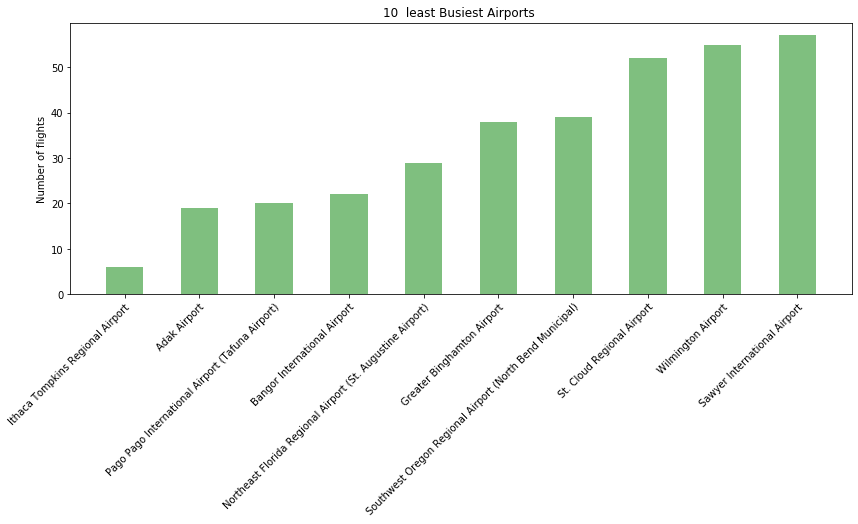

In [19]:
fig, axes = plt.subplots(figsize=(14, 5))
new_indexes1=[]
AIRLINES = df1.pivot_table(index=['ORIGIN_AIRPORT'], aggfunc='size')
airlines=AIRLINES.nsmallest(10)
airline_labels  = airlines.index
AIRLINES1       = airlines.values
for i in range(len(airline_labels)):
  dfb = (df2[df2['IATA_CODE']==airline_labels[i]].index[0])
  new_indexes1.append(df2.AIRPORT[dfb])
#print(new_indexes1)
axes.bar(new_indexes1, AIRLINES1, align="center", width=0.5, alpha=0.5,color = 'g')
axes.set_ylabel('Number of flights')
axes.set_title('10  least Busiest Airports ')
axes.set_xticklabels(new_indexes1)
plt.setp(axes.get_xticklabels(),rotation=45,ha='right',rotation_mode='anchor')

#Top 10 Airports With Maximum Tax Collection

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

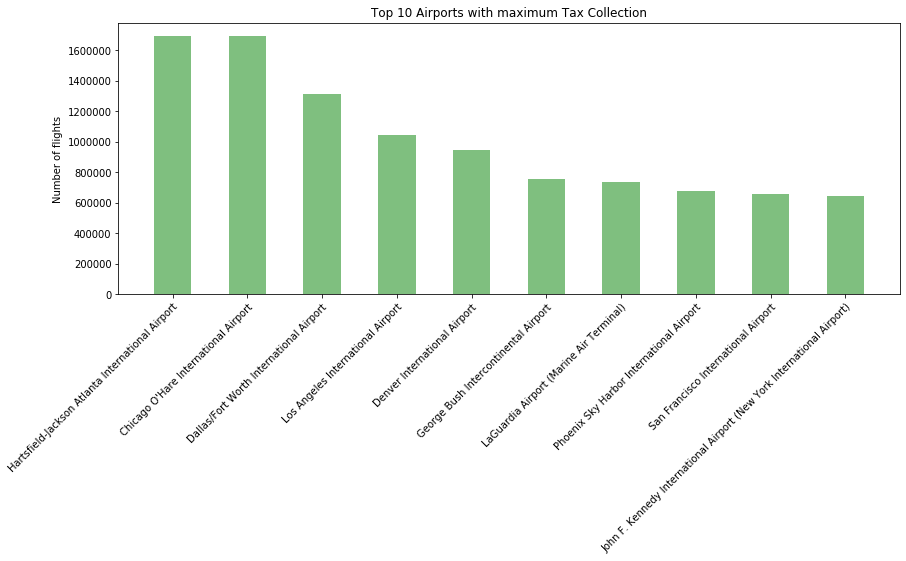

In [20]:
fig, axes = plt.subplots(figsize=(14, 5))
new_indexes=[]
AIRLINES = df1.groupby("ORIGIN_AIRPORT").TAXI_OUT.sum()
AIRLINES1 = df1.groupby("DESTINATION_AIRPORT").TAXI_IN.sum()
sumof_ailines=AIRLINES+AIRLINES1
airlines=sumof_ailines.nlargest(10)
airline_labels  = airlines.index
AIRLINES1       = airlines.values

for i in range(len(airline_labels)):
  dfb = int(df2[df2['IATA_CODE']==airline_labels[i]].index[0])
  new_indexes.append(df2.AIRPORT[dfb])
axes.bar(new_indexes, AIRLINES1, align="center", width=0.5, alpha=0.5,color = 'g')
axes.set_ylabel('Number of flights')
axes.set_title('Top 10 Airports with maximum Tax Collection')
axes.set_xticklabels(new_indexes)
plt.setp(axes.get_xticklabels(),rotation=45,ha='right',rotation_mode='anchor')

In [21]:
df1

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,DIVERTED,CANCELLED,ON_TIME,Y,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,0,0,1,3,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,0,0,1,3,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,0,0,1,3,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,0,0,1,3,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2015,3,25,3,AS,695,N767AS,GEG,SEA,500,...,0,0,1,3,NaN,NaN,NaN,NaN,NaN,NaN
1048571,2015,3,25,3,B6,746,N659JB,PSE,JFK,500,...,0,0,1,3,NaN,NaN,NaN,NaN,NaN,NaN
1048572,2015,3,25,3,B6,962,N564JB,SJU,BOS,500,...,0,0,0,0,NaN,3.0,0.0,9.0,4.0,0.0
1048573,2015,3,25,3,B6,1504,N606JB,SJU,JFK,500,...,0,0,1,3,NaN,NaN,NaN,NaN,NaN,NaN


# Percentage of ON Time flights Of each Airline

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

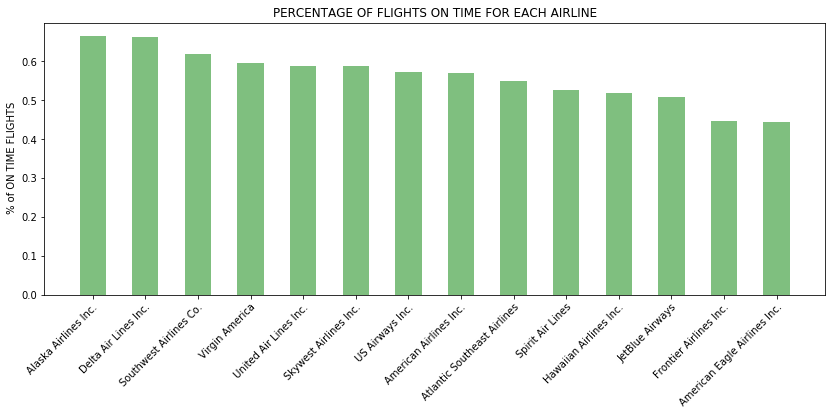

In [22]:
   
fig, axes = plt.subplots(figsize=(14, 5))
new_indexes=[]
AIRLINES = df1["AIRLINE"].value_counts()
cancelled=df1.groupby("AIRLINE").ON_TIME.sum().sort_values(ascending = False)
percent=(cancelled/AIRLINES).sort_values(ascending=False)

airline_labels  = percent.index
AIRLINES       =  percent.values
for i in range(len(airline_labels)):
  dfb = int(df[df['IATA_CODE']==airline_labels[i]].index[0])
  new_indexes.append(df.AIRLINE[dfb])
axes.bar(new_indexes, AIRLINES, align="center", width=0.5, alpha=0.5,color = 'g')
axes.set_ylabel(' % of ON TIME FLIGHTS')
axes.set_title('PERCENTAGE OF FLIGHTS ON TIME FOR EACH AIRLINE')
axes.set_xticklabels(new_indexes)
plt.setp(axes.get_xticklabels(),rotation=45,ha='right',rotation_mode='anchor') 

#Flights Representation On daily Bases

#OVERAALL DELAY PERCENTAGE IN MONTHS

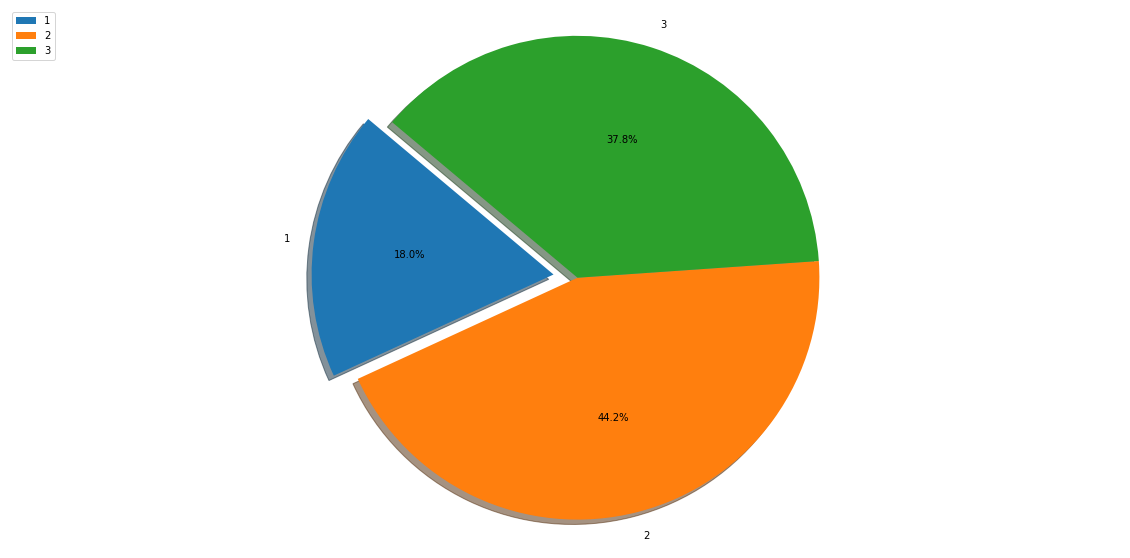

In [23]:
delay=df1.groupby("MONTH").ARRIVAL_DELAY_STATUS.sum()
labels = delay.index
sizes = delay.values
fig, axes = plt.subplots(figsize=(20, 10))
explode = (0.1, 0, 0)  # explode 1st slice

# Plot
axes.pie(sizes, explode=explode, labels=labels,
autopct='%1.1f%%', shadow=True, startangle=140)

axes.axis('equal')
plt.legend(loc='upper left')
plt.show()

#Average Delay Of Each Airline

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

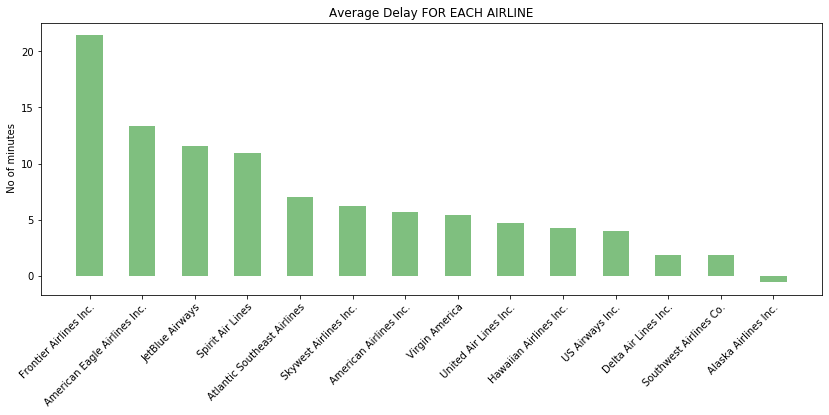

In [24]:
x=df1.groupby("AIRLINE").ARRIVAL_DELAY.sum()
y=df1["AIRLINE"].value_counts()
z=(x/y).sort_values(ascending=False)
fig, axes = plt.subplots(figsize=(14, 5))
new_indexes=[]
airline_labels  = z.index
AIRLINES       =  z.values
for i in range(len(airline_labels)):
  dfb = int(df[df['IATA_CODE']==airline_labels[i]].index[0])
  new_indexes.append(df.AIRLINE[dfb])
axes.bar(new_indexes, AIRLINES, align="center", width=0.5, alpha=0.5,color = 'g')
axes.set_ylabel(' No of minutes')
axes.set_title('Average Delay FOR EACH AIRLINE')
axes.set_xticklabels(new_indexes)
plt.setp(axes.get_xticklabels(),rotation=45,ha='right',rotation_mode='anchor') 


In [25]:
df1['DepDate'] = pd.to_datetime(df1.YEAR*10000+df1.MONTH*100+df1.DAY,format='%Y%m%d')
df1=df1.drop(['YEAR'],axis=1)
df1=df1.drop(['MONTH'],axis=1)
df1=df1.drop(['DAY'],axis=1)

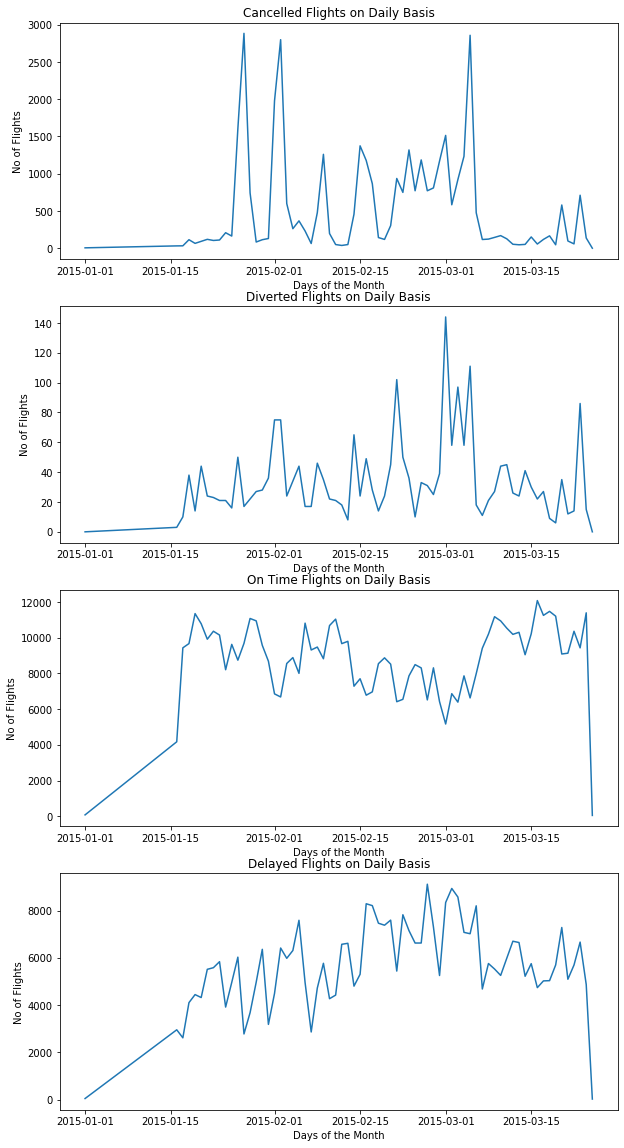

In [26]:
diverted=df1.groupby("DepDate").DIVERTED.sum()
on_time=df1.groupby("DepDate").ON_TIME.sum()
arrival_delay=df1.groupby("DepDate").ARRIVAL_DELAY_STATUS.sum()
cancelled=df1.groupby("DepDate").CANCELLED.sum()
index=cancelled.index
values=cancelled.values
fig, axes = plt.subplots(4, 1,figsize=(10,20))
#fig.suptitle('Horizontally stacked subplots')
axes[0].plot(index, cancelled.values)
axes[0].set_title("Cancelled Flights on Daily Basis")
axes[1].plot(index, diverted.values)
axes[1].set_title("Diverted Flights on Daily Basis")
axes[2].plot(index,on_time.values)
axes[2].set_title("On Time Flights on Daily Basis")
axes[3].plot(index,arrival_delay.values)
axes[3].set_title("Delayed Flights on Daily Basis")
for ax in axes.flat:
    ax.set(xlabel='Days of the Month', ylabel='No of Flights')